In [101]:
%matplotlib notebook

from pylab import *
from scipy.stats import *

In [102]:
# Population
total_population = 208e6

percentage_0_14 = 0.23
percentage_15_64 = 0.69
percentage_65_ = 0.08

num_adults = total_population*(percentage_15_64 + percentage_65_)

In [103]:
# Labor force
percentage_labor_force = 0.71
labor_force = num_adults*percentage_labor_force

disabled_adults = 19e6

In [111]:
# Monetary
basic_income = 880*12 # salario minimo nominal anual
current_wealth_transfers = 240e9 # aproximadamente 10% do PIB

In [112]:
def jk_rowling(num_non_workers):
    num_of_jk_rowlings = binom(num_non_workers, 1e-9).rvs()
    return num_of_jk_rowlings * 1e9

def basic_income_cost_benefit():
    direct_costs = num_adults * basic_income
    administrative_cost_per_person = norm(250,75)
    non_worker_multiplier = uniform(-0.10, 0.15).rvs()
    non_workers = (num_adults-labor_force-disabled_adults) * (1+non_worker_multiplier)
    marginal_worker_productivity = norm(1.2*basic_income,0.1*basic_income)

    administrative_costs = num_adults * administrative_cost_per_person.rvs()
    labor_effect_costs_benefit = -1 * ((num_adults-labor_force-disabled_adults) *
                                       non_worker_multiplier *
                                       (marginal_worker_hourly_productivity.rvs())
                                       )
    return direct_costs + administrative_costs + labor_effect_costs_benefit - jk_rowling(non_workers)

def basic_job_cost_benefit():
    administrative_cost_per_disabled_person = norm(500,150).rvs()
    administrative_cost_per_worker = norm(5000, 1500).rvs()
    non_worker_multiplier = uniform(-0.20, 0.25).rvs()
    basic_job_productivity = uniform(0.0, basic_income).rvs()

    disabled_cost = disabled_adults * (basic_income + administrative_cost_per_disabled_person)
    num_basic_workers = ((num_adults - disabled_adults - labor_force) *
                         (1+non_worker_multiplier)
                         )

    basic_worker_cost_benefit = num_basic_workers * (
        basic_income +
        administrative_cost_per_worker -
        basic_job_productivity
        )
    return disabled_cost + basic_worker_cost_benefit


N = 1024*4
bi = zeros(shape=(N,), dtype=float)
bj = zeros(shape=(N,), dtype=float)

for k in range(N):
    bi[k] = basic_income_cost_benefit()
    bj[k] = basic_job_cost_benefit()

<IPython.core.display.Javascript object>


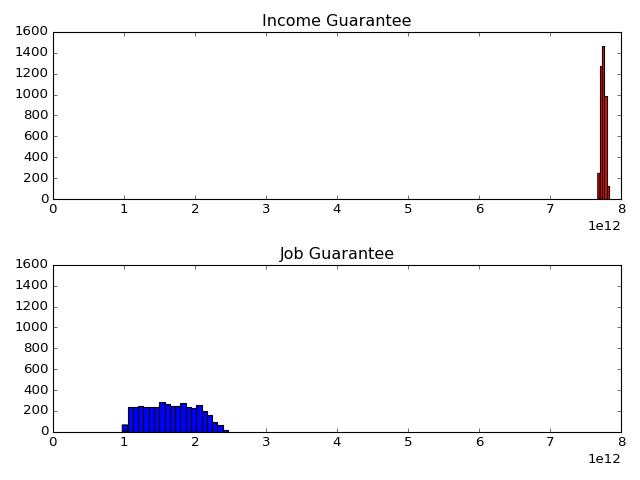

In [117]:
subplot(211)
start = 0
width = 8e12
height= 400*N/1024

title("Income Guarantee")
hist(bi, bins=5, color='red')
axis([start,width,0,height])

subplot(212)
title("Job Guarantee")
hist(bj, bins=20, color='blue')

axis([start,width,0,height])

tight_layout()
show()